In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

In [28]:
attr=['Group', 'Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of Ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']
data=pd.read_csv(open('vino.csv'), names=attr)

In [29]:
print data

     Group  Alcohol  Malic Acid   Ash  Alkalinity of Ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
5        1    14.20        1.76  2.45               15.2        112   
6        1    14.39        1.87  2.45               14.6         96   
7        1    14.06        2.15  2.61               17.6        121   
8        1    14.83        1.64  2.17               14.0         97   
9        1    13.86        1.35  2.27               16.0         98   
10       1    14.10        2.16  2.30               18.0        105   
11       1    14.12        1.48  2.32               16.8         95   
12       1    13.75        1.73  2.41               16.0         89   
13    

In [30]:
datawine = data.iloc[:,1:].values

In [31]:
print datawine

[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]


In [32]:
#Se define la función kmeans, inicializando centros con k-datos para los centros iniciales 
def kmeans (datawine, k = 2, n = 5):
    centers = datawine[np.random.choice(range(datawine.shape[0]), k, replace=False ),:]
    J=[]
#Se calcula el cuadrado de las distancias de cada punto de datos de cada centro y se suma a lo largo del eje 2
#Luego se encuentra el mínimo de todas las muestras
#Se devuelve una matriz que indica que cada cluster es mas cercano a la muestra de datos.
    for i in  range(n):
        d = np.sum(( centers [:, np.newaxis,:]-datawine)**2, axis=2)
        closest = np.argmin ( d, axis=0)
#Se calcula J y se añade a la lista J
        J.append(calculateJ(datawine,centers))
#Se toman los centros tomando la media en todas las muestras de datos   
        for p in  range(k):
            centers [p ,:]  = datawine [closest==p,:].mean(axis=0)

        
    J.append(calculateJ( datawine ,centers))
    return centers, J, closest 
 

In [33]:
def calculateJ(datawine ,centers):
#se calculan los cuadrados de las distancias de cada punto a su centro
#estas diatancias se suman a lo largo del eje 2
#Se toma el mìnimo a lo largo de las columnas
#Siendo J=medida de rendiemiento
    dist = (centers[:,np.newaxis,:]-datawine)**2
    return np.sum(np.min(np.sum(dist ,axis =2), axis=0))

centers, J, closest = kmeans(datawine,2,15)

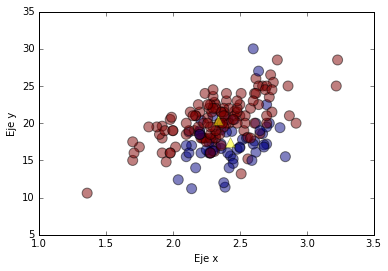

In [34]:
#Dispersión datos del Vino con 2-clusters
plt.scatter(datawine [:,2], datawine [:,3], s =100, c=closest, alpha =0.5);
plt.plot(centers[0,2],centers[0,3], ' ^ ', markersize =10,c="yellow", alpha =0.5);
plt.plot(centers[1,2],centers[1,3], ' ^ ', markersize =10,c="yellow" , alpha =0.5);
plt.xlabel("Eje x") 
plt.ylabel("Eje y") 
plt.show()

In [35]:
def calculateJ(datawine ,centers):
    dist = (centers[:,np.newaxis,:]-datawine)**2
    return np.sum(np.min(np.sum(dist ,axis =2), axis=0))

centers, J, closest = kmeans(datawine,3,15)

def kmeans (datawine, k = 3, n = 5):
    centers = datawine[np.random.choice(range(datawine.shape[0]), k, replace=False ),:]
    J=[]

    for i in  range(n):
        d = np.sum(( centers [:, np.newaxis,:]-datawine)**2, axis=2)
        closest = np.argmin ( d, axis=0)

        J.append(calculateJ(datawine,centers))
 
        for p in  range(k):
            centers [p ,:]  = datawine [closest==p,:].mean(axis=0)

        
    J.append(calculateJ( datawine ,centers))
    return centers, J, closest 
 

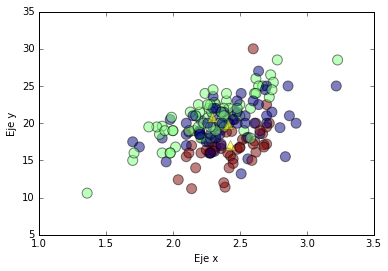

In [36]:
#Dispersión datos del Vino con 3-clusters
plt.scatter(datawine [:,2], datawine [:,3], s =100, c=closest, alpha =0.5);
plt.plot(centers[0,2],centers[0,3], ' ^ ', markersize =10,c="yellow", alpha =0.5);
plt.plot(centers[1,2],centers[1,3], ' ^ ', markersize =10,c="yellow", alpha =0.5);
plt.plot(centers[2,2],centers[2,3], ' ^ ', markersize =10,c="yellow", alpha =0.5);
plt.xlabel("Eje x") 
plt.ylabel("Eje y") 
plt.show()

In [37]:
def calculateJ(datawine ,centers):
    dist = (centers[:,np.newaxis,:]-datawine)**2
    return np.sum(np.min(np.sum(dist ,axis =2), axis=0))

centers, J, closest = kmeans(datawine,4,15)

def kmeans (datawine, k = 4, n = 5):
    centers = datawine[np.random.choice(range(datawine.shape[0]), k, replace=False ),:]
    J=[]

    for i in  range(n):
        d = np.sum(( centers [:, np.newaxis,:]-datawine)**2, axis=2)
        closest = np.argmin ( d, axis=0)

        J.append(calculateJ(datawine,centers))
 
        for p in  range(k):
            centers [p ,:]  = datawine [closest==p,:].mean(axis=0)

        
    J.append(calculateJ( datawine ,centers))
    return centers, J, closest 
 

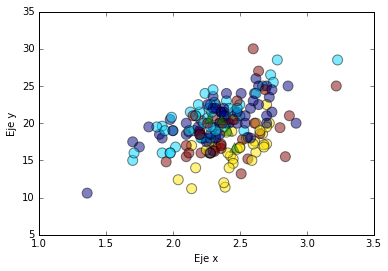

In [38]:
#Dispersión datos del Vino con 4-clusters
plt.scatter(datawine [:,2], datawine [:,3], s =100, c=closest, alpha =0.5);
plt.plot(centers[0,2],centers[0,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[1,2],centers[1,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[2,2],centers[2,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[3,2],centers[3,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.xlabel("Eje x") 
plt.ylabel("Eje y") 
plt.show()

In [39]:
def calculateJ(datawine ,centers):
    dist = (centers[:,np.newaxis,:]-datawine)**2
    return np.sum(np.min(np.sum(dist ,axis =2), axis=0))

centers, J, closest = kmeans(datawine,7,15)

def kmeans (datawine, k = 7, n = 5):
    centers = datawine[np.random.choice(range(datawine.shape[0]), k, replace=False ),:]
    J=[]

    for i in  range(n):
        d = np.sum(( centers [:, np.newaxis,:]-datawine)**2, axis=2)
        closest = np.argmin ( d, axis=0)

        J.append(calculateJ(datawine,centers))
 
        for p in  range(k):
            centers [p ,:]  = datawine [closest==p,:].mean(axis=0)

        
    J.append(calculateJ( datawine ,centers))
    return centers, J, closest 

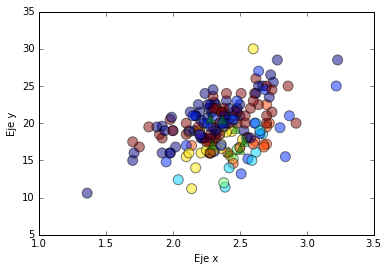

In [40]:
#Dispersión datos del Vino con 7-clusters
#Centros de clusters verdes
plt.scatter(datawine [:,2], datawine [:,3], s =100, c=closest, alpha =0.5);
plt.plot(centers[0,2],centers[0,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[1,2],centers[1,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[2,2],centers[2,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[3,2],centers[3,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[4,2],centers[4,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[5,2],centers[5,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.plot(centers[6,2],centers[6,3], ' ^ ', markersize =10,c="green", alpha =0.5);
plt.xlabel("Eje x") 
plt.ylabel("Eje y") 
plt.show()
#En el análisis de datos se observa que se logra una buena clasificación de datos con un numero optimo de 3 Clusters

In [41]:
X=data.ix[:,1:].values
y=data.ix[:,0].values

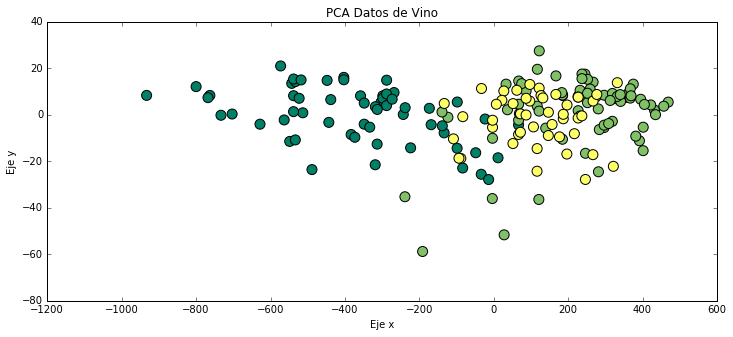

In [42]:
#Análisis de PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
reduced_X = pca.fit_transform(X)

plt.figure(figsize=(12,5))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=y, cmap=plt.cm.summer, edgecolors='k', s=100, linewidths=1)
plt.title('PCA Datos de Vino')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
#2 componentes son las optimas

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X=data.ix[:,1:].values
y=data.ix[:,5].values

In [45]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X[:89], y[:89])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

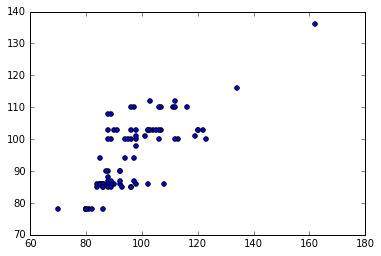

In [46]:
prediction = rf.predict(X[89:])
plt.scatter(y[89:], prediction)

In [53]:
#No se bien cual target utilizar
n_trees_total =8
square_sum = np.zeros(n_trees_total)
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(X[:89], y[:89])
    prediction = rf.predict(X[89:])
    square_sum[i] = sum((prediction - y[89:])**2)

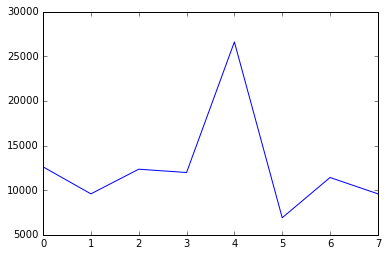

In [54]:
plt.plot(square_sum)